# Endimensjonal kvantemekanisk brønnmodell for atomer, molekyler og krystaller

I denne notatboken skal vi undersøke en enkel kvantemekanisk modell for atomer, molekyler og krystaller, der potensialet omkring enkeltatomer modelleres som brønnpotensialer.
Dette gjør vi ved å finne og analysere stasjonære løsninger av schrödingerlikningen og tilhørende energier.

Omkring en atomkjerne vil det være et potensiale som elektroner med masse $m_e$ kan befinne seg i.
I vår enkle, endimensjonale modell vil vi beskrive dette potensialet som et brønnpotensial

$$V(x) = \begin{cases} -V_0 & |x| \leq w / 2 \\ 0 & \text{ellers} \\ \end{cases}$$

omkring et atom med bredde $w$ sentrert i origo, der vi neglisjerer vekselvirkning mellom elektronene.
For å beskrive molekyler og atomer, konstruerer vi nye potensialer bestående av flere slike brønnpotensialer, som hver representerer et atom i molekylet eller krystallen. Disse plasseres ved siden av hverandre, separert med områder med null potensiale og bredde $b$, som modellerer bindinger og bindingslengder i molekyl- eller krystallstrukturen.

De stasjonære tilstandene $\Psi(x, t) = \psi(x) e^{i E t / \hbar}$ vil da ha energiegenfunksjoner $\psi(x)$ og tilhørende energier $E$ som løser den tidsuavhengige Schrödingerlikningen
$$-\frac{\hbar^2}{2 m_e} \psi''(x) + V(x) \psi(x) = E \psi(x),$$
der $V(x)$ er et potensial og $\hbar$ er Plancks konstant.

Elektronet er et fermion som kan ha to spinnverdier, navngitt "opp" og "ned".
I henhold til Paulis eksklusjonsprinsipp vil da maksimalt to elektroner okkupere tilstander med en gitt energi.

Schrödingerlikningen har sjelden analytiske løsninger.
Derfor vil vi her løse den numerisk ved å dele opp rommet i $N + 2$ punkter $x_0 = 0, x_1, \ldots, x_N, x_{N+1} = L$ med avstand $\Delta x = L / (N + 1)$ mellom hvert punkt.
Hvert punkt tilordnes potensialet $V_n = V(x_n)$ og verdien $\psi_n = \psi(x_n)$ for energiegenfunksjonen.
For å avgrense problemet, innfører vi randbetingelsene $V_0 = V_{N+1} = \infty$, slik at $\psi_0 = \psi_{N+1} = 0$.
I tillegg tilnærmer vi de deriverte av energiegenfunksjonen med
$$\psi_n' = \psi'(x_n) = \frac{\psi_{n+1} - \psi_n}{\Delta x} \qquad \text{og} \qquad \psi_n'' = \psi''(x_n) = \frac{\psi_n' - \psi_{n-1}'}{\Delta x} = \frac{\psi_{n+1} - 2 \psi_n + \psi_{n-1}}{{\Delta x}^2}.$$

Problemet er dermed redusert til å finne verdier $\psi_1, \ldots, \psi_N$ for energiegenfunksjonen og tilhørende energier $E$ som oppfyller

$$-\frac{\hbar^2}{2 m_e} \frac{\psi_{n+1} - 2 \psi_n + \psi_{n-1}}{{\Delta x}^2} + V_n \psi_n = E \psi_n.$$
Dette er ekvivalent med å finne egenvektorer $\boldsymbol{\psi} = [\psi_1, \ldots, \psi_N]^T$ og tilhørende egenverdier $E$ som oppfyller matriselikningen
$$H \boldsymbol{\psi} = E \boldsymbol{\psi},$$
der matrisen $H$ er en symmetrisk matrise med $H_{n, n} = \hbar^2 / m {\Delta x}^2 + V_n$ langs diagonalen, $H_{n, n \pm 1} = -\hbar^2 / 2 m {\Delta x}^2$ over og under diagonalen og $0$ andre steder.
Dette er et velkjent problem fra lineær algebra med mange effektive programvareimplementasjoner, hvilket er utgangspunktet for vår numeriske løsningsmetode.

Vi benytter her Python og numerikkbiblioteket `numpy` for beregninger, i samspill med plottebiblioteket `matplotlib` for å visualisere beregningene.

In [ ]:
# For some reason Jupyter does not like to have %matplotlib inline in same cell as rcParams
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Setup plotting parameters
newparams = {'axes.labelsize': 15,
             'axes.linewidth': 1,
             'lines.linewidth': 1.5, 
             'figure.figsize': (16, 8),
             'ytick.labelsize': 15,
             'xtick.labelsize': 15,
             'ytick.major.pad': 5,
             'xtick.major.pad': 5,
             'legend.fontsize': 15,
             'legend.frameon': True, 
             'legend.handlelength': 1.5,
             'axes.titlesize': 20,
             'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral'}
plt.rcParams.update(newparams)

Nedenfor defineres enkelte fysiske konstanter som er sentrale i beregningene: den reduserte planckkonstanten $\hbar = h/2\pi$ og elektronmassen $m_e$.
For å unngå numeriske feil forårsaket av store og små flyttall, vil vi hele tiden arbeide med avstander benevnt i nanometer og energier benevnt i elektronvolt.
Disse enhetene er dessuten naturlige på atomær skala, og er årsaken bak all skalering av enheter som forekommer.

In [ ]:
from scipy.constants import eV, m_e as m, hbar
hbar = hbar * 1e9 # Convert from Js to nJs

## Numerisk løsning av uendelig potensialbrønn

Før vi går i gang med å modellere atomer, molekyler og krystaller, vil vi teste vår numeriske løsningsmetode på det velkjente eksemplet med en partikkel i en uendelig dyp potensialbrønn.

Vi undersøker her et elektron med masse $m_e$ i en boks med lengde $L = 10 \,\, \mathrm{nm}$ oppdelt i henhold til den innledende beskrivelsen med $N = 1000$.
For å finne egenfunksjoner og egenverdier til matrisen $H$ som løser den diskretiserte tidsuavhengige schrödingerlikningen, benytter vi funksjonen `eigh` fra `numpy`.
Resultatene fremstilles grafisk ved at potensialet, energiene og energiegenfunksjonene plottes i én figur.
Egenfunksjonenes form er kun av kvalitativ interesse, og plottes derfor rundt deres respektive energier med en vilkårlig skalering.

In [ ]:
def get_stationary_states(dx, V):
    factor = hbar**2 / (m * dx**2) / eV
    diag = factor + V
    second_diag = -factor/2 * np.ones(diag.shape[0] - 1)
    H = np.diag(diag) + np.diag(second_diag, k=1) + np.diag(second_diag, k=-1)
    
    eigvals, eigvecs = np.linalg.eigh(H)
    energies, waves = eigvals, eigvecs.T
    return energies, waves

def plot_potential_stationary_states(x, V, energies, waves, nr, label_energies = True, clip_y_axis = False, num_labels = 3, **kwargs):
    plt.title(kwargs.pop("title", ""))
    plt.xlabel("$x \,\, (nm)$")
    plt.ylabel("$V(x), E_n \,\, (eV)$")
    
    plt.plot(x, V, color="grey", linestyle="solid", linewidth=3, label="$V(x)$")
    
    wave_scale_factor = kwargs.pop("wave_scale_factor", 10) # amplitudes of waves are unimportant
    for i in range(0, len(nr)):
        n = nr[i]
        energy, wave = energies[n], waves[n]
        color = "C%d" % (n % 10)
        label = "$E_{%d} = %+.4f \,\, eV, \psi_{%d}$" % (n, energy, n) if label_energies and i <= num_labels else None
        plt.plot((x[0], x[-1]), (energy, energy), color=color, linestyle="dashed", label=label)
        plt.plot(x, energy + wave * wave_scale_factor, color=color, linestyle="solid")
    if clip_y_axis:
        # Sets upper y limit to biggest wave
        y_max = np.amax( wave_scale_factor * waves[nr] + energies[nr][:, np.newaxis] )   
        axes = plt.gca()
        axes.set_ylim([None, y_max + 0.1 * np.abs(y_max)])
    
    plt.legend(loc="upper left")

N = 1000
L = 10
dx = L / (N + 1)
x = np.linspace(dx, N * dx, N)
V = np.zeros(N)
n = 6
energies, waves = get_stationary_states(dx, V)

print("Greatest deviation from orthonormality:", np.max(np.abs(waves @ waves.T - np.eye(N))))

title = "Tilstander for uendelig potensialbrønn med L = %.2f nm (beregnet numerisk)" % L
plot_potential_stationary_states(x, V, energies, waves, range(0, n), title=title)

Det er kjent at de stasjonære løsningene av schrödingerlikningen er ortogonale og danner et fullstendig sett, slik at en vilkårlig tilstand representert med en vilkårlig bølgefunksjon kan uttrykkes som en lineær kombinasjon av disse.

I denne diskretiserte modellen, forventer vi derfor på tilsvarende måte at de $N$ egenvektorene $\boldsymbol{\psi}$ er ortogonale, slik at de er en basis for $\mathbb{R}_N$ og en vilkårlig diskretisert bølgefunksjon kan uttrykkes som en lineær kombinasjon av disse.
`eigh`-funksjonen er dokumentert til å returnere normerte egenvektorer, og vi forventer her derfor at egenvektorene er ortonormerte.
Forventningen er ekvivalent med $A^T A = A A^T = I$, der $A$ er $N \times N$-matrisen med alle egenvektorene langs radene eller kolonnene, og stemmer med et neglisjerbart avvik.

Vi sammenligner nå resultatene med analytiske verdier
$$E_n = \frac{n^2 \hbar^2 \pi^2}{2mL^2} \quad \text{og} \quad \psi_n = \sqrt{\frac{2}{L}} \sin{\frac{n \pi x}{L}}, \quad \text{for} \quad n = 1,2,\dots$$
for energiene og egenfunksjonene.<sup>[1]</sup>


In [ ]:
energies, waves = [], []
for i in range(1, n + 1):
    energy = hbar**2 * i**2 * np.pi**2 / (2 * m * L**2) / eV
    wave = np.sqrt(2 / L) * np.sin(i * np.pi * x / L) * np.sqrt(dx)
    energies.append(energy)
    waves.append(wave)
    
title = "Tilstander for uendelig potensialbrønn med L = %.2f nm (analytiske verdier)" % L
plot_potential_stationary_states(x, V, energies, waves, range(0, n), title=title)

Vi ser at den numeriske løsningen og de analytiske uttrykkene produserer like energier og energiegenfunksjoner som kun skiller seg med et fortegn som ikke er av fysisk betydning.
Merk at de analytiske egenfunksjonene er skalert med $\sqrt{\Delta x}$ for å gjøre den sammenliknbar med den numeriske bølgefunksjonen, da Riemannsummen i integralnormeringen $\int |\psi|^2 dx \approx \sum |\psi_i|^2 \Delta x$ av bølgefunksjonen og den euklidske vektornormen $\sqrt{\sum \psi_i^2}$ avviker med denne faktoren.

## Modellering av enkeltatom

Herfra kommer vi kun til å modellere situasjoner der potensialet er sammensatt av ett eller flere brønnpotensialer med bredde $w$ og dybde $V_0$, adskilt med barriereområder med null potensiale og bredde $b$.
Derfor innfører vi allerede her en funksjon som genererer et sammensatt brønnpotensiale gitt antall brønner $N_w$, antall punkter $n_w$ og $n_b$ henholdsvis i hver brønn og barriere og brønndybden $V_0$.

Potensialet kan alternativt genereres på en mer intuitiv måte gitt mer naturlige størrelser som $N_w$, $N$, $w$ og $b$.
Svakheten med en slik metode er at antall punkter i brønnene og barrierene vil variere.
Denne feilen blir betydningsfull når antall brønner vokser, og brønnene og barrierene blir små og inneholder få punkter.
Dette er årsaken til at vi heller benytter et konstant antall punkter i hver brønn og barriere.

For å gjøre ting enkelt herfra, har vi også innført en funksjon som enkelt lar oss utforske energier og egenfunksjoner gitt $N_w$, $n_w$, $n_b$, $w$, $V_0$.
Denne beregner $b = (n_b / n_w) w$ og presenterer energiene og egenfunksjonene grafisk.

Vi modellerer enkeltatomet med én brønn med bredde $w = 0.5 \,\, \mathrm{nm}$, som tilsvarer et atoms diameter innenfor en størrelsesorden.
Med $V_0 = 10 \,\, \mathrm{eV}$, får vi til sammen tre bundne energinivåer.

In [ ]:
def V_crystal(N_w, n_w, n_b, V0):
    well = np.append(-V0*np.ones(n_w), np.zeros(n_b)) # One well plus barrier
    wells = np.tile(well, N_w)
    potential = np.append(np.zeros(10*n_w), wells) # Pad 10w before wells
    potential = np.append(potential, np.zeros(10*n_w - n_b)) # Pad after wells
    return potential

def partition_space(N, N_w, w, b):
    L = 10 * w + N_w * w + (N_w - 1) * b + 10 * w
    dx = L / (N + 1)
    x = np.linspace(dx, N * dx, N)
    return L, dx, x

def investigate_potential(N_w, n_w, n_b, w, V0, nr, **kwargs):
    """
    :include_engy_legend : whether to include labels for energy in legend
    :clip_y_axis         : sets upper limit of y_axis to biggest wave value,
                           so that if potential is much bigger than wave, we can "zoom-in"
    """
    b = n_b / n_w * w
    V = V_crystal(N_w, n_w, n_b, V0)
    N = 2 * 10 * n_w + N_w * n_w + (N_w - 1) * n_b
    L, dx, x = partition_space(N, N_w, w, b)
    print("N = %d points" % N)
    energies, waves = get_stationary_states(dx, V)

    title = "%d lowest-energy states with %d wells, well width %.2f and well distance %.2f" % (n, N_w, w, b)
    plot_potential_stationary_states(x, V, energies, waves, nr, title=title, **kwargs)
    
N = 1000
w = 0.5 # nm
n = 20
V0 = 10 # eV
n_w = 50
investigate_potential(1, n_w, 0, w, V0, range(0, 15))

Fra figuren kommer det frem at annenhver bølgefunksjon er symmetrisk og antisymmetrisk, hvilket stemmer med teori. 
Vi ser også at bølgefunksjonene for grunntilstanden, første og andre eksiterte tilstand henholdsvis har 0, 1 og 2 nullpunkter. 
De er også kontinuerlige og oppfyller randbetingelsen ved veggene, der potensialet blir uendelig stort.
Innenfor det klassisk tillatte brønnområdet, har $n$-te eksiterte tilstand en omtrentlig bølgelengde $\lambda_n = 2 w / (n + 1)$.
Dette stemmer også med teori. 

Vi sammenlikner nå energiene med analytiske verdier gitt ved
$$E_n = \frac{z^2\hbar^2}{2 m (w/2)^2} - V_0,$$
der $z$ er reelle løsninger av likningene
$$\tan{z} = \sqrt{\frac{z_0^2}{z^2} - 1} \quad \text{og} \quad \tan{(z + \frac{\pi}{2})} = \sqrt{\frac{z_0^2}{z^2} - 1},$$
med $z_0 = \frac{w}{2 \hbar} \sqrt{2 m V_0}.$<sup>[1]</sup>
Funksjonene på likningenes venstre- og høyresider er presentert grafisk under.

In [ ]:
z0 = w / 2 / hbar * np.sqrt(2 * m * V0 * eV)
def lhs1(z): return np.tan(z)
def lhs2(z): return np.tan(z + np.pi / 2)
def rhs(z): return np.sqrt((z0/z)**2 - 1)
    
x = np.linspace(0, z0, 1000)[1:]
plt.plot(x, np.where(lhs1(x) < 100, lhs1(x), np.inf), label="$\\tan{z}$")
plt.plot(x, np.where(lhs2(x) < 100, lhs2(x), np.inf), label="$\\tan{(z + \pi/2)}$")
plt.plot(x, rhs(x), label="$\sqrt{(z_0/z)^2-1}$")
plt.ylim(0, 10)
plt.legend()

xvals = np.append(np.arange(0, z0, np.pi / 2), z0)
xticks = ["$0$", "$\pi / 2$", "$\pi$"][:len(xvals)]
xticks += [("$%d \pi$" % (k / 2)) if k % 2 == 0 else ("$%d \pi / 2$" % k) for k in range(3, len(xvals) - 1)]
xticks += ["$z_0$"]
plt.xticks(xvals, xticks)

for xval in xvals[1:-1]:
    plt.axvline(xval, color="black", linestyle="dashed")

Likningene kan ikke løses analytisk.
Fra figuren ser vi at de to likningene har én løsning på annenhvert intervall med lengde $\pi/2$ fra $0$ til $z_0$.
Vi leter derfor etter numeriske løsninger på disse intervallene og regner ut de korresponderende energiverdiene.

In [ ]:
from scipy import optimize

def f1(z): return lhs1(z) - rhs(z)
def f2(z): return lhs2(z) - rhs(z)

n_s = int(z0 / (np.pi / 2)) + 1
for i in range(0, n_s):
    a = i * np.pi / 2
    b = a + np.pi / 2
    x0 = (a + b) / 2
    f = f1 if i % 2 == 0 else f2
    z = optimize.fsolve(f, x0)[0]
    energy = (z**2 * hbar**2 / (2 * m * (w/2)**2) - V0 * eV) / eV
    print("E_%d = %.4f eV" % (i, energy))

Verdiene samsvarer svært godt med de beregnede verdiene for energien fra figuren med verdiene i figuren med energiverdier og egenfunksjoner.

I tillegg til de tre bølgefunksjonene i brønnen, er det tegnet inn bølgefunksjoner ovenfor brønnen.
Disse representerer bølgefunksjoner for ubundne tilstander. 
De er altså bølgefunksjoner for frie elektroner, som har for stor kinetisk energi til å fanges av det elektriske feltet til atomkjernen.
Et slikt elektron skal, langt unna atomet, ha en upåvirket, sinusoidal bølgefunksjon, og bølgefunksjonene er ikke-normerbare.
Fra figuren ser vi at energinivåene til disse ubundne tilstandene ligger tett inntill hverandre. 
Dette tolkes som at energiene til de ubundne tilstandene har et kontinuerlig spektrum. 
Dette samsvarer med teori, som sier at energinivåene er kvantiserte i brønnen, og kontinuerlige utenfor. 
Dette vil si at et elektron kan ha et kontinuerlig spekter av energinivåer i tomt rom, mens energiverdiene er kvantisert til bestemte nivåer inne i brønnpotensialet.

TODO Les av bølgelengden. Si litt mer om elektronet?
Bølgelengden til elektronet leses fra grafen av til å være omkring $1 \,\, \mathrm{nm}$.


In [ ]:
investigate_potential(1, n_w, 0, w, V0, [15])

Når vi betrakter potensialbrønnen som en modell for et atom, representerer bølgefunksjonene mulige tilstander atomets elektroner kan befinne seg i.
Med tre bundne tilstander er det plass til inntil seks elektroner innenfor potensialbrønnen. 
Dette fordi pauliprinsippet utelukker muligheten for at det kan eksistere mer enn to elektroner (ett med spin opp og ett med spinn ned) i tilstander med en gitt energi.
En slik potensialbrønn kan dermed modellere atomer med atomnummer én til og med seks (hydrogen til og med karbon), som har ett til seks elektroner i grunntilstand. 
Disse atomenes totale elektronspinn kan finnes fra pauliprinsippet: 
Dersom et atom har et partall antall elektroner (slik som i helium og karbon), vil dets totale elektronspinn i grunntilstanden være null. 
Dersom det har et odde antall elektroner (som i hydrogen og litium), blir spinnet $S = \pm \frac{\sqrt{3}}{2} \hbar$. 
Spinnet kan også ta andre verdier dersom elektronene eksiteres fra grunntilstanden. Disse verdiene vil alle være heltallige multiplum av $\frac{\sqrt{3}}{2} \hbar$.

## Modellering av toatomig molekyl

For å modellere et toatomig molekyl, setter vi sammen to enkeltbrønnpotensialer fra modelleringen av enkeltatomet.
Ved å benytte samme bredde og dybde på brønnene som i atommodellen, modellerer vi et molekyl som består av to like atomer og som vi kan sammenligne med modellen av enkeltatomet.
De to brønnene separeres med en liten avstand $b = w / 5$, som representerer bindingslengden i molekylet.

In [ ]:
wells_per_barrier = 5
n_w = 50
n_b = n_w // wells_per_barrier
investigate_potential(2, n_w, n_b, w, V0, range(0, n))

Vi får her dobbelt så mange stasjonære tilstander som i modellen av enkeltatomet, og dermed plass til dobbelt så mange elektroner.
Dette stemmer godt med forventningen om at en sammensetning av to identiske enkeltbrønner burde kunne modellere et molekyl som består av to like enkeltatomer.

Det er interessant å observere at grunntilstanden og 1. eksiterte tilstand har energier like under og like over grunntilstandsenergien for enkeltatomet.
Dette resultatet kan knyttes opp mot teori om bindende og antibindende orbitaler.
Grunntilstandsenergien i molekylet, rett under grunntilstandsenergien i atomet, har en tendens til å gi molekyler lavere energi enn den samlede energien til de frie atomene det består av.
Siden forbindelser av lavere energi er mer stabile, har denne orbitalen en bindende effekt, og kalles derfor en *bindende orbital*.
På tilsvarende måte har energien til den første eksiterte tilstanden i molekylet en tendens til å gi molekylet høyere energi enn atomene, da den er noe høyere enn energien i grunntilstanden til atomet.
Denne kalles derfor en *antibindende orbital*.

TODO: talleksempel med 2H -> H2 og 2He -> He2
<!-- TODO: sammenlign kvantitativt (i hvert fall relativt mellom H og He) fra tall i Wikipedia-artikler -->
<!-- https://en.wikipedia.org/wiki/Helium_dimer -->
<!-- https://en.wikipedia.org/wiki/Bond-dissociation_energy -->
<!-- https://en.wikipedia.org/wiki/Antibonding_molecular_orbital -->

## Modellering av krystall

En krystall kan kvalitativt modelleres med mange brønner i et periodisk mønster.
Det brukes her samme brønndybde, bredde og barrierebredde som i tidligere avsnitt. 
Vi plotter først energinivåene og egenfunksjonene for henholdsvis $N_w = 5$ og $N_w = 10$ brønner.

In [ ]:
n_w = 50
n_b = n_w // wells_per_barrier
num_wells = 5
num_engy_to_show = 2 * num_wells + 1
investigate_potential(num_wells, n_w, n_b, w, V0, range(0, num_engy_to_show), label_energies=False, clip_y_axis=True)

In [ ]:
n_w = 50
n_b = n_w // wells_per_barrier
num_wells = 10
num_engy_to_show = 2 * num_wells + 1
investigate_potential(num_wells, n_w, n_b, w, V0, range(0, num_engy_to_show), label_energies=False, clip_y_axis=True)

Vi observerer at med $N_w = 5$ og $N_w = 10$ får vi henholdsvis 5 og 10 energinivåer i "bånd" rundt de to første energinivåene i et atom, slik to atomer fikk to bundne tilstander rundt enkeltatomets energinivåer.

Det ser ut til at båndene blir mer tettpakket med energinivåer jo flere brønner vi bruker uten at gapet mellom båndene blir vesentlig mindre.
Dette kan bety at båndbredden, differansen mellom den største og minste energien i et bånd, konvergerer mot en verdi når antall brønner øker.
Vi undersøker dette nærmere ved å se på båndbredden til de 3 laveste båndene som funksjon av antall brønner mellom 1 og 50.

In [13]:
to_wells = 50
n_w = 15
n_b = n_w // wells_per_barrier
dx = w / n_w

band_widths = np.empty((3,0)) # We must have an empty list to use append

for num in range(1, to_wells + 1, 2):
    V = V_crystal(num, n_w, n_b, V0)
    energies, waves = get_stationary_states(dx, V)
    bonds = energies[:3*num].reshape(-1, num)[:, [0, -1]] # Three first bonds, first and last value
    band_widths = np.append(band_widths, np.diff(bonds), axis=1)
    print("\rBand width calculation progress: %.0f %%" % (num / to_wells * 100), end="")
    
plt.title("Båndbredde som funksjon av antall brønner")
plt.xlabel("Antall brønner")
plt.ylabel("Båndbredde ($eV$)")
for i, band in enumerate(band_widths):
    plt.plot(np.linspace(1, to_wells + 1, len(band)), band, label="Bånd %d" % (i + 1))
    plt.axhline(band[-1], linewidth=1, color="grey", alpha=.8, linestyle="dashed")
plt.legend(bbox_to_anchor=(0.97, 0.9))

Vi ser av figuren at alle de tre båndene raskt konvergerer mot en fast bredde når antall atomer øker.
Dette tyder på at båndbredden er en karakteristisk egenskap ved krystaller, som jo betår av mange atomer.

Vi ser nå på en krystall der hvert atom har 4 elektroner, slik at det er $4 N_w$ elektroner i krystallen.
I grunntilstanden vil disse okkupere tilstander med de $2 N_w$ laveste energiene, på grunn av pauliprinsippet.

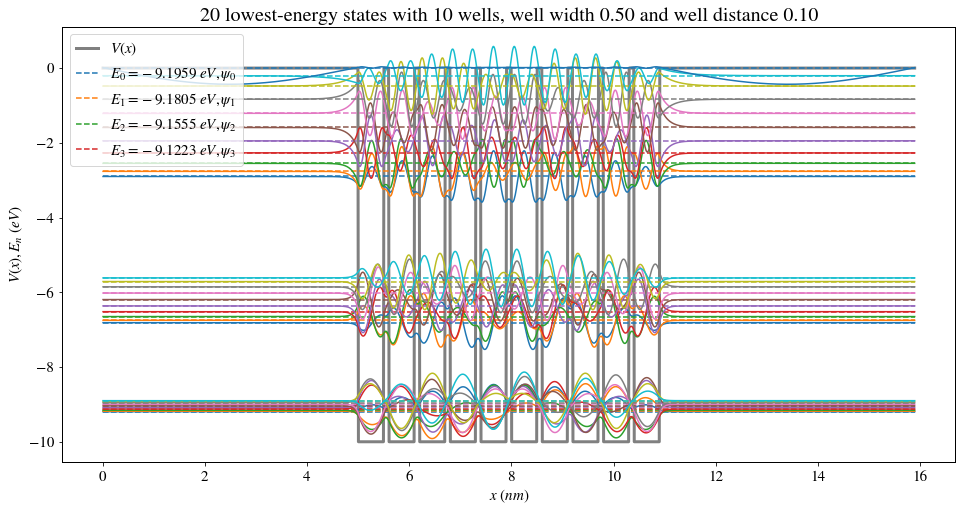

In [14]:
n_w = 50
n_b = n_w // wells_per_barrier
num_wells = 10
num_to_plot = 3 * num_wells + 1  # plot first three bands and one more energy level
investigate_potential(num_wells, n_w, n_b, w, V0, range(0, num_to_plot))

TODO: Skjekke at disse tallene også gjelder før vi leverer

At de $4N_w$ elektronene okkuperer de $2N_w$ første orbitalene tilsvarer at de to første båndene er fylt opp og at det tredje båndet er helt tomt. De (to) elektronene med høyest energi er derfor elektronene som befinner seg i høyeste energi i andre bånd, som vi ut fra figuren leser til å være ca. $-6 \,\, \mathrm{eV}$.
Nærmeste ledige tilstand er da første energinivå i tredje bånd, som har en energi som vi fra figuren ser er omtrent $-3 \,\, \mathrm{eV}$.
_Båndgapet_ er altså omtrent $3 \,\, \mathrm{eV}$. 
Denne verdien tilsier at den modellerte krystallen er på grensen mellom å være en halvleder og isolator.

Til slutt skal vi se på noen egenskaper ved energiegenfunksjonene for slike periodiske potensialer.
Ifølge Blochs teorem skal løsningene av den tidsuavhengige schrödingerlikningen for et periodisk potensial $V(x + n p) = V(x)$ med periode $p$ være på formen $\psi_k(x) = e^{ikx} u_k(x)$, der $u_k(x + n p) = u_k(x)$ er en funksjon med samme periode som potensialet.

N = 1590 points


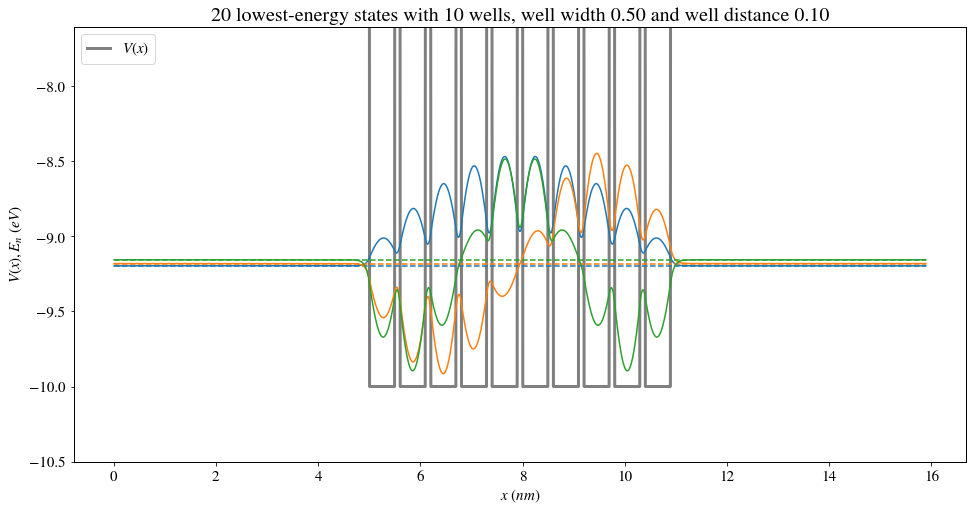

In [15]:
n_w = 50
n_b = n_w // wells_per_barrier
investigate_potential(num_wells, n_w, n_b, w, V0, range(0, 3), clip_y_axis=True, label_energies=False, wave_scale_factor=10)

Fra figuren ser man tydelig at bølgefunksjonene består av en periodisk funksjon med lik periode som potensialet og som er modulert med en sinusbølge.
Dette stemmer godt overens med Blochs teorem, der $e^{ikx}$ erstattes med $\sin{kx}$ når man forlanger $\psi = 0$ utenfor krystallen.
Vi ser også at den modulerende sinusbølgen for den $n$-te eksiterte tilstanden har bølgelengde $\lambda_n = 2 W / (n + 1)$, der $W$ er lengden av brønnområdet.

## Konklusjon

## Om nøyaktigheten til modellen

Det er viktig å understreke at brønnmodellen er en primitiv modell for atomer, molekyler og krystaller.
Den vil ikke gi nøyaktige eller kvantitativt korrekte tallverdier, men den lar oss belyse enkelte kvalitative egenskaper.
Vi vil her benytte en brønn med en fast verdi for brønndybden $V_0$ til å modellere ulike atomer med ulike antall protoner i kjernen. I realiteten vil brønndybden rundt ulike atomer med forskjellige antall protoner i kjernen variere. 
Dette er et eksempel på modellens mangler.
For at beregningene skal gi et rimelig bilde av systemet som modelleres, vil en brønnbredde på 0.1 nm benyttes, sammen med de korrekte verdiene for Plancks (reduserte) konstant og elektronmassen. Denne brønnbredden velges, da 0.1 nm er et vanlig anslag for størrelsen av et atom
For å tvinge frem observerbare forskjeller på de ulike situasjonene og illustrere kvalitative forskjeller, er vi derimot nødt til å redusere bindingslengden mellom atomene til noe under deres realistiske verdi. Til slutt må brønndybden velges for å gi et ønsket antall bundne tilstander. Denne settes til en "tilfeldig" størrelse, uten andre kriterier enn at antall bundne tilstander skal bli som ønsket, og valget er ikke begrunnet i teori ut over dette.

## Referanser

[1] D. J. Griffiths, D. F. Schroeter. Introduction to Quantum Mechanics (third edition). 2018.